In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
# tensor fow is low level api
# keras is high level api
# keras is wraper of tensor folow function

In [5]:
tf.keras.__version__

'2.8.0'

In [6]:
tf.config.list_physical_devices("GPU")

[]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Sequential API
# Data of hand written digit
# Each data 2d array(28*28)
# 10 class (0 to 9)

In [15]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [14]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Sagnik\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [16]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [17]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [19]:
 y_train_full.shape, y_test.shape

((60000,), (10000,))

In [22]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
# Normalize data and create Validation data
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

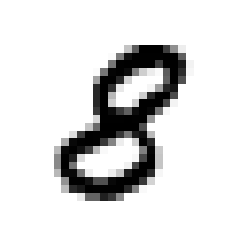

8

In [27]:
plt.imshow(X_train[5], cmap="binary")
plt.axis("off")
plt.show()
y_train[5]

<AxesSubplot:>

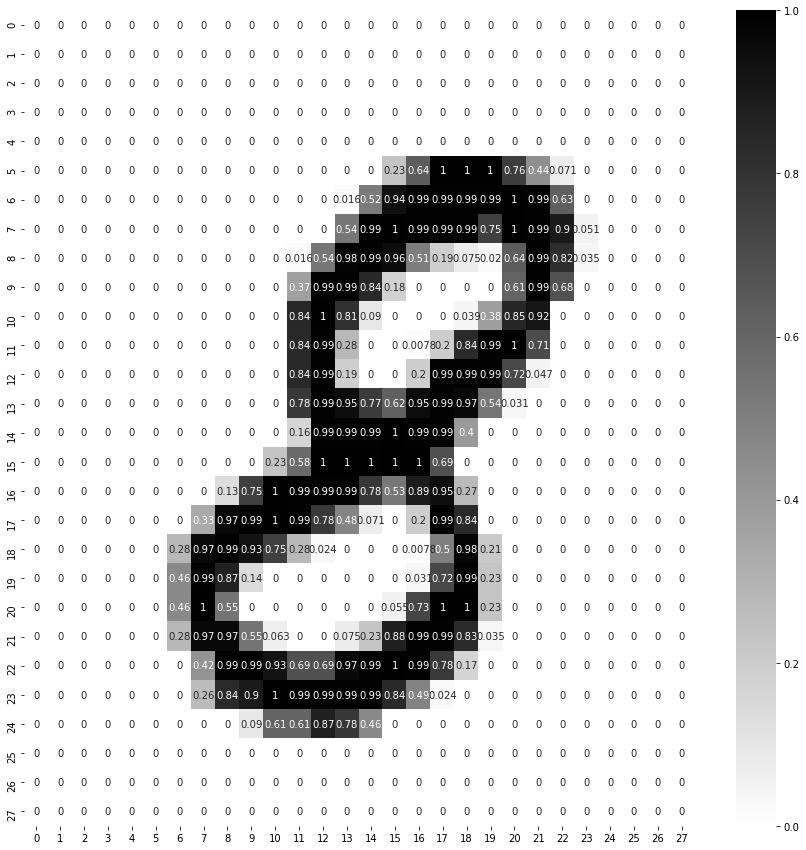

In [25]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[5], annot=True, cmap="binary")

In [28]:
# Sequential Means every layer connected not skipping the layers
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),# conver 2d array to 1d array
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [29]:
model = tf.keras.models.Sequential(LAYERS)

In [30]:
model.layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
print("hiddenLayer1 (Dense) weight->",784*300,"bias->",300,"total parameter-->",(784*300)+300)

hiddenLayer1 (Dense) weight-> 235200 bias-> 300 total parameter--> 235500


In [36]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [37]:
hidden1.get_weights()

[array([[ 0.03776532, -0.00818976,  0.06714058, ..., -0.03325413,
         -0.06398463, -0.01120917],
        [-0.06997697, -0.04034141,  0.0258134 , ..., -0.0316998 ,
         -0.042928  ,  0.05998226],
        [ 0.0433174 ,  0.0105058 , -0.06403823, ...,  0.05928153,
         -0.04110189, -0.00953697],
        ...,
        [ 0.00265802,  0.06147791, -0.03306568, ..., -0.04429651,
          0.01581894, -0.04678744],
        [ 0.03204884,  0.06816876, -0.07036649, ...,  0.05909133,
          0.03911626, -0.06183361],
        [ 0.01613682, -0.04690266,  0.04127772, ..., -0.05187543,
         -0.06194073, -0.04924764]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [38]:
weights, biases = hidden1.get_weights()

In [39]:
weights.shape

(784, 300)

In [40]:
biases.shape

(300,)

In [41]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # this is function give us error our objective is to reduce this error
OPTIMIZER = "SGD" # how you updating weight Wnew=Wold+N(error)
METRICS = ["accuracy"] # can de list of matrix

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 
(for example if epoch is 30 that means 30 it will feed entire dataset but how we gonna feed the data 
that is important we feed by mentioning batch size)
* **batch_size**: Integer or None. (NO OF SAMPLES IN EACH BATCHES)
(Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples. by calculating average error.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.


200*1000=200000(200 samole 1000 epoch so 200000 times)  40000*5=200000(40000 batches each batch contain 5 samples 200000 times))
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [42]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6266 - accuracy: 0.8372 - val_loss: 0.3148 - val_accuracy: 0.9122
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2913 - accuracy: 0.9172 - val_loss: 0.2480 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2376 - accuracy: 0.9320 - val_loss: 0.2051 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2026 - accuracy: 0.9424 - val_loss: 0.1824 - val_accuracy: 0.9474
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1764 - accuracy: 0.9495 - val_loss: 0.1693 - val_accuracy: 0.9538
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1557 - accuracy: 0.9553 - val_loss: 0.1463 - val_accuracy: 0.9590
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1387 - accuracy: 0.9601 - val_loss: 0.1360 - val_accuracy:

In [44]:
#x_train have 55000 data
print(55000/32)# 1719 is sample in each batch 1719 weight update happen
print(1719*32)# 1 epoch means 55008 samples or 1719*32 samples(no of batches*samples in each batches)

# after passing one batch it calculate average error and update weight
# so after passing one batch RAM has to remember all weights then update it so 
# if you have less memory then set batch size minimum

1718.75
55008


In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9788


[0.07107503712177277, 0.9787999987602234]

In [46]:
X_test.shape

(10000, 28, 28)

In [51]:
313*32

10016

In [47]:
model.save("model.h5")

In [48]:
loaded_model = tf.keras.models.load_model("model.h5")

In [49]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9788


[0.07107503712177277, 0.9787999987602234]

In [52]:
history.history

{'loss': [0.6265579462051392,
  0.29125839471817017,
  0.2376268357038498,
  0.20259380340576172,
  0.17635412514209747,
  0.15569333732128143,
  0.13873033225536346,
  0.1255940943956375,
  0.11392910778522491,
  0.10415256023406982,
  0.09615321457386017,
  0.08876235038042068,
  0.08213497698307037,
  0.07637756317853928,
  0.0709867998957634,
  0.06674737483263016,
  0.06238013133406639,
  0.05846076458692551,
  0.05508563295006752,
  0.051441799849271774,
  0.04865952208638191,
  0.04572666808962822,
  0.042946457862854004,
  0.04045497626066208,
  0.03819771483540535,
  0.03608579933643341,
  0.033979058265686035,
  0.032154373824596405,
  0.030476031824946404,
  0.028850724920630455],
 'accuracy': [0.837218165397644,
  0.9172363877296448,
  0.9319636225700378,
  0.9423636198043823,
  0.9495454430580139,
  0.9552545547485352,
  0.9601091146469116,
  0.9642000198364258,
  0.9675272703170776,
  0.9705818295478821,
  0.972527265548706,
  0.9751999974250793,
  0.9768182039260864,
  0

In [53]:
type(history.history)

dict

In [50]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.626558,0.837218,0.314825,0.9122
1,0.291258,0.917236,0.247996,0.9318
2,0.237627,0.931964,0.205104,0.9414
3,0.202594,0.942364,0.182387,0.9474
4,0.176354,0.949545,0.169289,0.9538
5,0.155693,0.955255,0.146326,0.9590
6,0.138730,0.960109,0.136031,0.9626
7,0.125594,0.964200,0.124800,0.9664
8,0.113929,0.967527,0.117965,0.9676
9,0.104153,0.970582,0.111096,0.9690


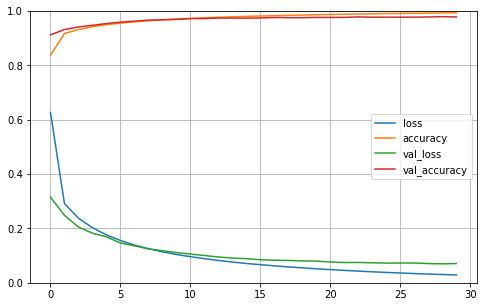

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [58]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1], dtype=int64), array([7, 2, 1], dtype=uint8))

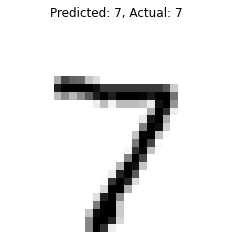

------------------------------------------------------------


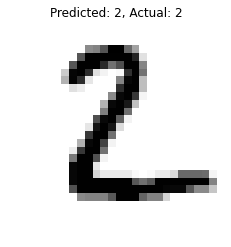

------------------------------------------------------------


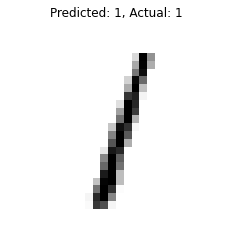

------------------------------------------------------------


In [61]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

# CALL BACKS

In [62]:
# Its a function which give us more info

In [63]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [64]:
# Normalize data and create Validation data
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [65]:
# writing samples to tensor board

In [66]:
## Get unique timestamp

import time

def get_timestamp():
    return time.asctime().replace(" ", "_").replace(":", "")

In [67]:
get_timestamp()

'Wed_Mar_30_201128_2022'

In [69]:
import os
def get_log_dir_path(log_dir="logs/fit"):
    log_path = os.path.join(log_dir, get_timestamp())
    print(f"logs will be saved at: {log_path}")
    return log_path

log_dir = get_log_dir_path()
log_dir

logs will be saved at: logs/fit\Wed_Mar_30_201238_2022


'logs/fit\\Wed_Mar_30_201238_2022'

In [70]:
file_writer = tf.summary.create_file_writer(logdir=log_dir)

In [71]:
with file_writer.as_default():
    images = np.reshape(X_train[10: 30], (-1, 28, 28, 1))
    tf.summary.image("20 handwritten digit samples", images, max_outputs=25, step=0)

In [72]:
%load_ext tensorboard

In [73]:
%tensorboard --logdir logs/fit

In [74]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [75]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [76]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [77]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # stop training earlier save 
# resource 
# patience=if validation loss not decrease in 5 epoch it will stop
# restore_best_weights= if your in 5 th epoch and you observe 2 nd epoch give best weight so it will store previous 
# best weight which will give you better accuracy or loss

In [78]:
# if you do 1000 epoch and in 500 epoch power will cut so we have to traig again
# check point help us to restore training
# save_best_only=True means it will save best weight(better accuracy or loss) if you use False then it will save last weight
CKPT_Path = "model_ckpt.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_Path, save_best_only=True)

In [79]:
LIST_OF_CALLBACKS = [tensorboard_cb, early_stopping_cb, checkpoint_cb]

In [80]:
EPOCHS = 300
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET, callbacks=LIST_OF_CALLBACKS)

Epoch 1/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0271 - accuracy: 0.9938 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 2/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0258 - accuracy: 0.9942 - val_loss: 0.0685 - val_accuracy: 0.9788
Epoch 3/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 0.0686 - val_accuracy: 0.9794
Epoch 4/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0231 - accuracy: 0.9951 - val_loss: 0.0704 - val_accuracy: 0.9786
Epoch 5/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0218 - accuracy: 0.9957 - val_loss: 0.0679 - val_accuracy: 0.9792
Epoch 6/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0207 - accuracy: 0.9962 - val_loss: 0.0676 - val_accuracy: 0.9788
Epoch 7/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0197 - accuracy: 0.9966 - val_loss: 0.0669 - val_ac

In [81]:
# not running 300 epoch it stops at 12 epochs

In [82]:
ckpt_model = tf.keras.models.load_model(CKPT_Path)

In [83]:
# it will start where we left
ckpt_history = ckpt_model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET, callbacks=LIST_OF_CALLBACKS)

Epoch 1/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 0.0690 - val_accuracy: 0.9796
Epoch 2/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0178 - accuracy: 0.9970 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 3/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0168 - accuracy: 0.9975 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 4/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9978 - val_loss: 0.0675 - val_accuracy: 0.9796
Epoch 5/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0152 - accuracy: 0.9979 - val_loss: 0.0669 - val_accuracy: 0.9802
Epoch 6/300
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0145 - accuracy: 0.9983 - val_loss: 0.0687 - val_accuracy: 0.9810
Epoch 7/300
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0137 - accuracy: 0.9984 - val_loss: 0.0693 - val_ac